# Fashion Mnist Dataset Classification

In [1]:
# importing necessary libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Loading dataset


In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# shape of the dataset

print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (60000, 28, 28)
Shape of the y_train:  (60000,)
Shape of the X_test:  (10000, 28, 28)
Shape of the y_test:  (10000,)


# Displaying the sample Images from the X_train


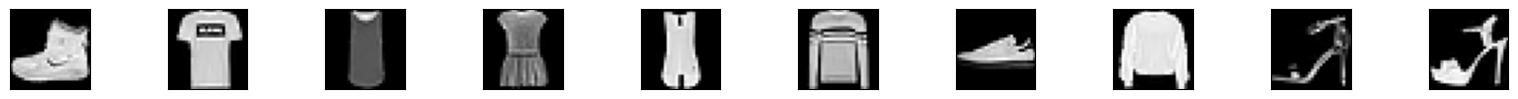

In [4]:
# number of images
n=10

plt.figure(figsize=(20,6))
for i in range(n):
  ax = plt.subplot(5, n, i+1)
  plt.imshow(X_train[i].reshape(28,28))
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()
plt.close()

# Image Reshape

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalizing Pixel Values

In [6]:
# normalizing the pixel values to 0-1

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

**Why?**

* CNNs converge faster when inputs are in a smaller, uniform range (0–1).

# One Hot encoding

In [7]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

**Why?**


* For multi-class classification, one-hot encoding is required for softmax output.

In [8]:
y_train_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078432],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.1882353 ],
        [0.16862746],
        [0.34117648],
        [0.65882355],
        [0.52156866],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215687],
        [0.53333336],
        [0.85882354],
        [0.84705883],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

# CNN model Building

In [10]:
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,290 (1.07 MB)

 Trainable params: 281,290 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compiling

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Model Training

In [13]:
history = model.fit(X_train, y_train_cat, epochs =10,
                    batch_size=128,
                    validation_split=0.1, verbose=1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7257 - loss: 0.7827 - val_accuracy: 0.8677 - val_loss: 0.3700
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8716 - loss: 0.3563 - val_accuracy: 0.8893 - val_loss: 0.3118
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8901 - loss: 0.2988 - val_accuracy: 0.8793 - val_loss: 0.3167
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9026 - loss: 0.2641 - val_accuracy: 0.8973 - val_loss: 0.2784
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9106 - loss: 0.2389 - val_accuracy: 0.9088 - val_loss: 0.2628
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9188 - loss: 0.2231 - val_accuracy: 0.9052 - val_loss: 0.2625
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9238 - loss: 0.2000 - val_accuracy: 0.8990 - val_loss: 0.2747
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9319 - loss: 0.1834 - val_accuracy: 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9139 - loss: 0.2595
Test Accuracy: 0.9143000245094299


# Training/Validation Curves

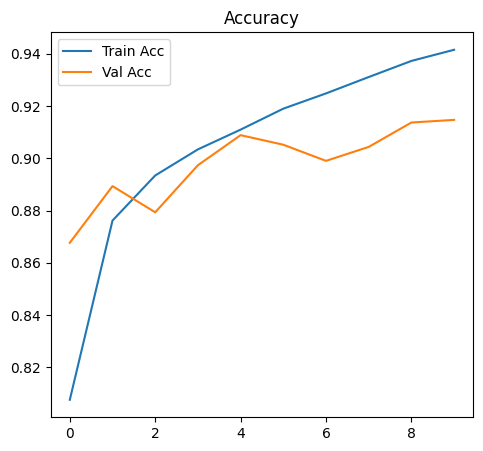

In [15]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label ="Train Acc")
plt.plot(history.history['val_accuracy'], label= 'Val Acc')

plt.title("Accuracy")
plt.legend()

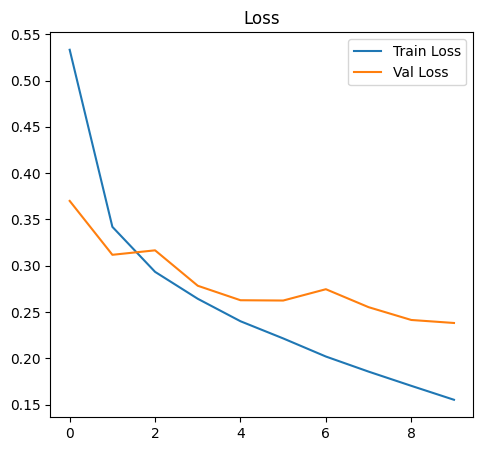

In [16]:
# loss plot
plt.figure(figsize=(12, 5))

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label ="Train Loss")
plt.plot(history.history['val_loss'], label= 'Val Loss')

plt.title("Loss")
plt.legend()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


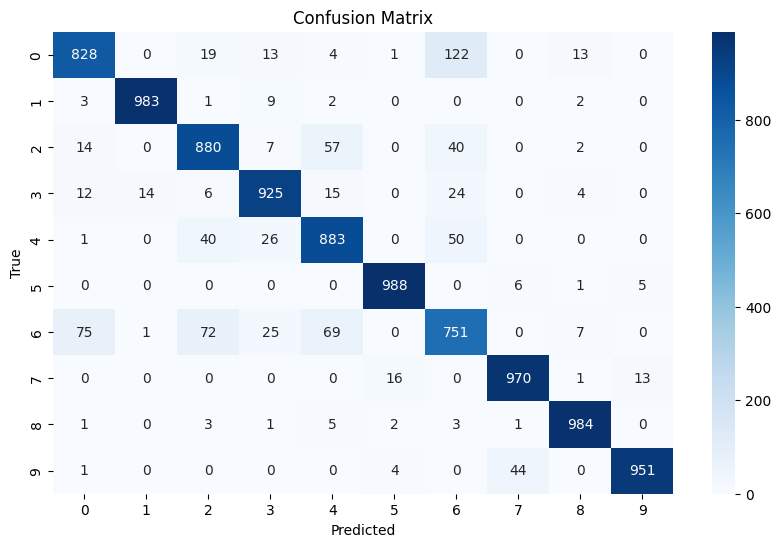

In [17]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




In [18]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.88      0.87      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.75      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Visualizing Sample Prediction


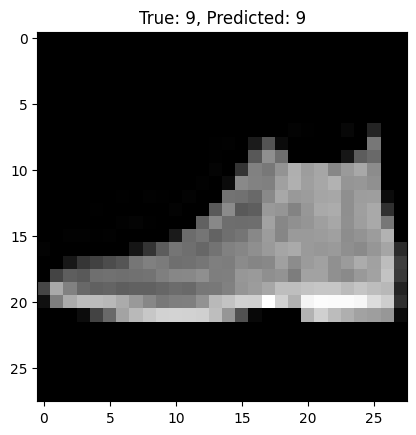

In [19]:
plt.imshow(X_test[0].reshape(28,28), cmap ='gray')
plt.title(f"True: {y_test[0]}, Predicted: {y_pred_labels[0]}")
plt.show()

# 5-Fold Cross Validation

In [20]:
kf = KFold(n_splits = 5, shuffle= True, random_state = 42)
subset_X = X_train[:10000]
subset_y = y_train_cat[:10000]


acc_scores = []

for train_index, test_index in kf.split(subset_X):
  model_cv = tf.keras.models.clone_model(model)
  model_cv.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

  model_cv.fit(subset_X[train_index], subset_y[train_index], epochs =10,
                    batch_size=128,
                    validation_split=0.1, verbose=0)

  _,acc = model_cv.evaluate(subset_X[test_index], subset_y[test_index], verbose=0)
  acc_scores.append(acc)



print('5-Fold Accuracy: %.4f, Std Dev: %.4f' % (np.mean(acc_scores), np.std(acc_scores)))

5-Fold Accuracy: 0.8641, Std Dev: 0.0101


# Model Save

In [21]:
model.save('fashion_mnist_model.h5')

In [22]:
with open("cnn_model.pkl", "wb") as f:
    pickle.dump(model, f)